In [1]:
import pandas as pd
import numpy as np
import os
import sys

#!pip install librosa
#!pip install lifelines
#!pip install np_utils
#!pip install tensorflow

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt


import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

## Importing and Splitting the datasets

In [2]:
#importing the datasets
train_set = pd.read_csv('outputs/train_set_augmented.csv')
test_set = pd.read_csv('outputs/test_set_augmented.csv')

In [3]:
#Split into features and target; x = features, y = target
x_train = train_set.iloc[:, 1:]
y_train = train_set['label']

x_test = test_set.iloc[:, 1:]
y_test = test_set['label']

In [4]:
x_test

,lm_1_x,lm_1_y,lm_1_z,lm_2_x,lm_2_y,lm_2_z,lm_3_x,lm_3_y,lm_3_z,lm_4_x,...,lm_475_z,lm_476_x,lm_476_y,lm_476_z,lm_477_x,lm_477_y,lm_477_z,lm_478_x,lm_478_y,lm_478_z
0,0.473046,0.696728,-0.091748,0.496471,0.604488,-0.168070,0.487032,0.632623,-0.092936,0.482524,...,0.045890,0.670601,0.442534,0.045891,0.639195,0.458482,0.045855,0.660743,0.485365,0.045862
1,0.492350,0.714685,-0.045139,0.539254,0.634724,-0.090736,0.501687,0.658425,-0.048153,0.519496,...,0.064536,0.587501,0.457886,0.064539,0.563775,0.476562,0.064510,0.579370,0.502035,0.064516
2,0.490669,0.726424,-0.042978,0.488736,0.653719,-0.136378,0.490637,0.671048,-0.063816,0.469890,...,-0.013364,0.624411,0.444959,-0.013364,0.599321,0.465061,-0.013393,0.623082,0.486691,-0.013390
3,0.487772,0.715298,-0.064368,0.496388,0.642020,-0.135233,0.493557,0.662816,-0.074048,0.482184,...,0.018728,0.626525,0.459460,0.018728,0.600760,0.478731,0.018701,0.624030,0.500750,0.018706
4,0.435017,0.681450,-0.019222,0.457655,0.626136,-0.113952,0.450812,0.634583,-0.041011,0.460500,...,-0.019818,0.633409,0.419269,-0.019812,0.600469,0.436421,-0.019841,0.621377,0.467850,-0.019836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6174,0.467074,0.711874,-0.066803,0.490944,0.603252,-0.139190,0.483111,0.631721,-0.069910,0.480523,...,0.021422,0.644667,0.400973,0.021424,0.611448,0.424229,0.021390,0.635391,0.457057,0.021397
6175,0.534954,0.675536,-0.061679,0.537082,0.602585,-0.165144,0.530123,0.622123,-0.084990,0.498073,...,0.014990,0.644270,0.378498,0.014996,0.619339,0.399653,0.014956,0.647869,0.417729,0.014964
6176,0.526639,0.603841,-0.079819,0.522552,0.541407,-0.123911,0.524735,0.568331,-0.071606,0.494399,...,0.037879,0.624804,0.382451,0.037881,0.603936,0.403715,0.037855,0.628075,0.421386,0.037861
6177,0.508241,0.732418,-0.038069,0.524389,0.678396,-0.128743,0.513136,0.690689,-0.060118,0.497018,...,0.005707,0.614172,0.442669,0.005707,0.591247,0.464957,0.005678,0.614524,0.487100,0.005681


In [5]:
y_test

0         sad
1         sad
2       happy
3       happy
4       anger
        ...  
6174    anger
6175    anger
6176      sad
6177    happy
6178      sad
Name: label, Length: 6179, dtype: object

In [6]:
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

#Get the labels
encoder = OneHotEncoder()
y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_test = encoder.fit_transform(np.array(y_test).reshape(-1,1)).toarray()

y_test

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape

x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((28263, 1434, 1), (28263, 4), (6179, 1434, 1), (6179, 4))

In [9]:
def init_model(x_train):
    model= Sequential()
    model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    
    model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    model.add(Dropout(0.2))
    
    model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    model.add(Dropout(0.2))
    
    model.add(Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    
    model.add(Flatten())
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(units=4, activation='softmax'))
    model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

    return model


model = init_model(x_train)
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1434, 256)         1536      
                                                                 
 max_pooling1d (MaxPooling1  (None, 717, 256)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 717, 128)          163968    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 359, 128)          0         
 g1D)                                                            
                                                                 
 dropout (Dropout)           (None, 359, 128)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 359, 64)         

In [10]:
def train_model(model, folder, x_train, y_train, x_test, y_test):
    checkpoint_filepath = os.getcwd() + '/' + folder + '/Epoch{epoch:02d}_{accuracy:.2f}.keras'
    checkpoint_filepath

    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    mode='max')

    early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

    rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.8, verbose=1, patience=2, min_lr=0.0001)

    history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[model_checkpoint_callback, early_stopping_callback, rlrp])
    return history

In [11]:
history = train_model(model, 'ckpt_cnn',  x_train, y_train, x_test, y_test)

Epoch 1/50


442/442 [==============================] - 87s 193ms/step - loss: 1.1340 - accuracy: 0.4870 - val_loss: 0.9923 - val_accuracy: 0.5854 - lr: 0.0010
Epoch 2/50
442/442 [==============================] - 84s 190ms/step - loss: 1.0059 - accuracy: 0.5528 - val_loss: 0.9465 - val_accuracy: 0.5914 - lr: 0.0010
Epoch 3/50
442/442 [==============================] - 84s 190ms/step - loss: 0.9649 - accuracy: 0.5732 - val_loss: 0.8951 - val_accuracy: 0.6166 - lr: 0.0010
Epoch 4/50
442/442 [==============================] - 85s 193ms/step - loss: 0.9300 - accuracy: 0.5876 - val_loss: 0.8899 - val_accuracy: 0.6202 - lr: 0.0010
Epoch 5/50
442/442 [==============================] - 87s 196ms/step - loss: 0.9126 - accuracy: 0.5973 - val_loss: 0.8480 - val_accuracy: 0.6410 - lr: 0.0010
Epoch 6/50
442/442 [==============================] - 84s 191ms/step - loss: 0.8944 - accuracy: 0.6091 - val_loss: 0.8188 - val_accuracy: 0.6477 - lr: 0.0010
Epoch 7/50
442/442 [==============================

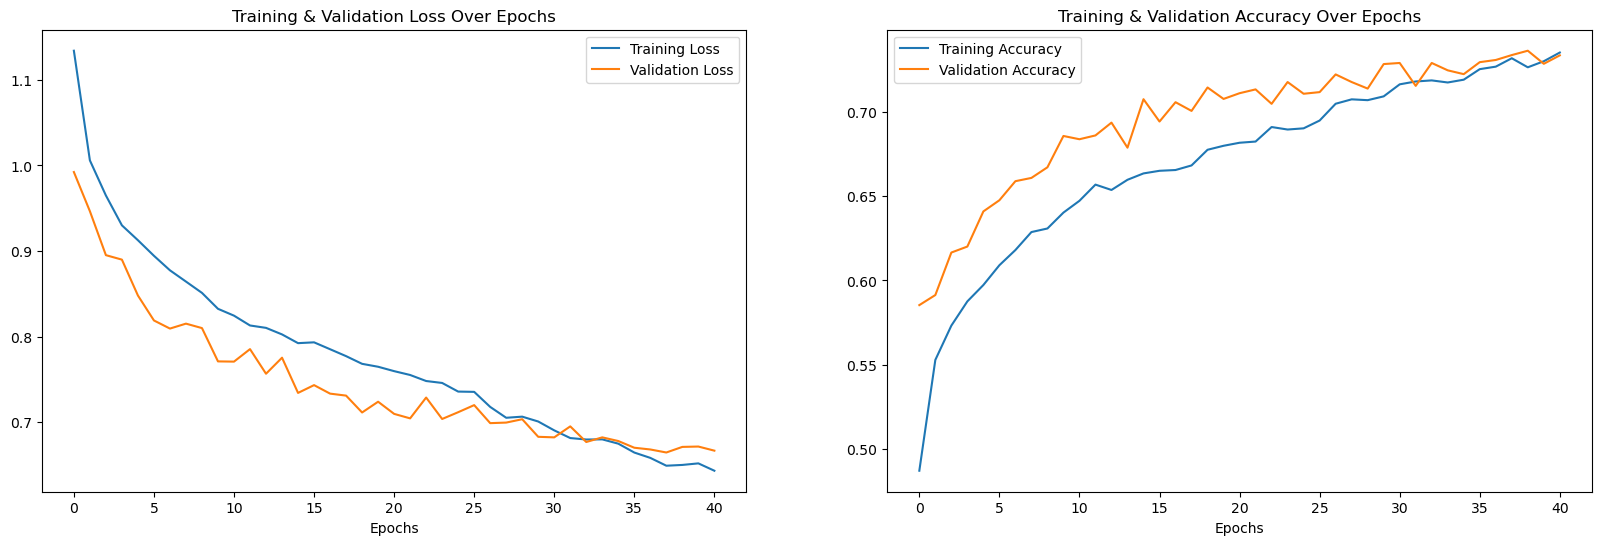

In [13]:
epochs = [i for i in range(41)]
fig, ax = plt.subplots(1,2)
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
test_accuracy = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs, train_loss, label = 'Training Loss')
ax[0].plot(epochs, test_loss, label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss Over Epochs')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs, train_accuracy, label = 'Training Accuracy')
ax[1].plot(epochs, test_accuracy, label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy Over Epochs')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [14]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

194/194 [==============================] - 5s 23ms/step


In [15]:
y_pred

array([['sad'],
       ['neutral'],
       ['happy'],
       ...,
       ['sad'],
       ['happy'],
       ['sad']], dtype=object)

        anger happy neutral  sad
anger    1083    53     302  224
happy      25  1569      79   62
neutral   118    53    1022  203
sad       158    53     315  860


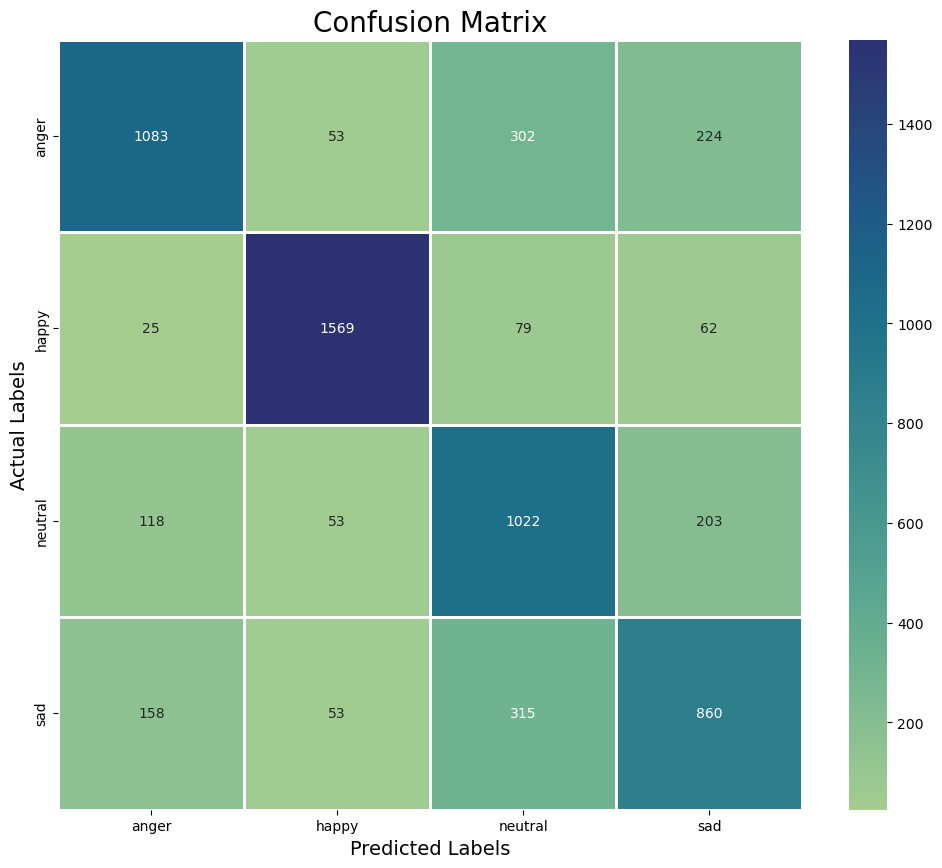

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='crest', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
print(cm)
plt.show()

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

acs_test = accuracy_score(y_test,y_pred)
ps_test = precision_score(y_test,y_pred, average = "macro")
rs_test = recall_score(y_test,y_pred,  average = "macro")
fs_test = f1_score(y_test,y_pred,  average = "macro")

print("Accuracy Score: ", "{:.2%}".format(acs_test))
print("Precision Score: ", "{:.2%}".format(ps_test))
print("Recall Score: ", "{:.2%}".format(rs_test))
print("F1 Score: ", "{:.2%}".format(fs_test))

Accuracy Score:  73.38%
Precision Score:  73.07%
Recall Score:  72.71%
F1 Score:  72.56%


In [18]:
#K fold Cross Validation Module

#1. Get all rows together
all_data_df = pd.concat([train_set, test_set])
num_rows = len(all_data_df.index)

In [19]:
#2. Shuffle rows
all_data_df = all_data_df.sample(frac=1).reset_index()
all_data_df = all_data_df.drop(columns=['index'])    

In [20]:
#K fold cross validation for k=5 (5 runs)
fold_num_rows = num_rows // 5
last_fold_num_rows = num_rows - (fold_num_rows * 4)

confusion_matrices = []
scores = []
for i in range(0, 5):
    #Get number of rows to retrieve
    start = i * fold_num_rows
    end = (i + 1) * fold_num_rows
    if i == 4:
        end = num_rows

    print("K =", str(i+1), "getting images from", str(start), "to", str(end))
    
    #Construct train and test split using iloc
    test_df = all_data_df.iloc[start:end, : ]
    train_df = pd.concat([all_data_df, test_df]).drop_duplicates(keep=False)

    x_train = train_df.iloc[:, 1:]
    y_train = train_df['label']
    
    x_test = test_df.iloc[:, 1:]
    y_test = test_df['label']

    encoder = OneHotEncoder()
    y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
    y_test = encoder.fit_transform(np.array(y_test).reshape(-1,1)).toarray()

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    x_train = np.expand_dims(x_train, axis=2)
    x_test = np.expand_dims(x_test, axis=2)

    #Train the model
    model = init_model(x_train)
    history = train_model(model, 'ckpt_cnn_k' + str(i+1), x_train, y_train, x_test, y_test)

    #Evaluate the model
    pred_test = model.predict(x_test)
    y_pred = encoder.inverse_transform(pred_test)
    y_test = encoder.inverse_transform(y_test)

    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
    
    acs_test = accuracy_score(y_test,y_pred)
    ps_test = precision_score(y_test,y_pred, average = "macro")
    rs_test = recall_score(y_test,y_pred,  average = "macro")
    fs_test = f1_score(y_test,y_pred,  average = "macro")

    fold_score = {
        "accuracy": acs_test,
        "precision": ps_test,
        "recall": rs_test,
        "f1": fs_test
    }

    #Save the scores
    confusion_matrices.append(cm)
    scores.append(fold_score)

K = 1 getting images from 0 to 6888
Epoch 1/50
396/396 [==============================] - 77s 191ms/step - loss: 1.1370 - accuracy: 0.4940 - val_loss: 1.0332 - val_accuracy: 0.5607 - lr: 0.0010
Epoch 2/50
396/396 [==============================] - 81s 204ms/step - loss: 0.9887 - accuracy: 0.5554 - val_loss: 0.9357 - val_accuracy: 0.6092 - lr: 0.0010
Epoch 3/50
396/396 [==============================] - 82s 208ms/step - loss: 0.9374 - accuracy: 0.5881 - val_loss: 0.8996 - val_accuracy: 0.6302 - lr: 0.0010
Epoch 4/50
396/396 [==============================] - 83s 208ms/step - loss: 0.9062 - accuracy: 0.6026 - val_loss: 0.8578 - val_accuracy: 0.6321 - lr: 0.0010
Epoch 5/50
396/396 [==============================] - 82s 207ms/step - loss: 0.8870 - accuracy: 0.6137 - val_loss: 0.8550 - val_accuracy: 0.6414 - lr: 0.0010
Epoch 6/50
396/396 [==============================] - 81s 205ms/step - loss: 0.8660 - accuracy: 0.6268 - val_loss: 0.8389 - val_accuracy: 0.6568 - lr: 0.0010
Epoch 7/50
396/3

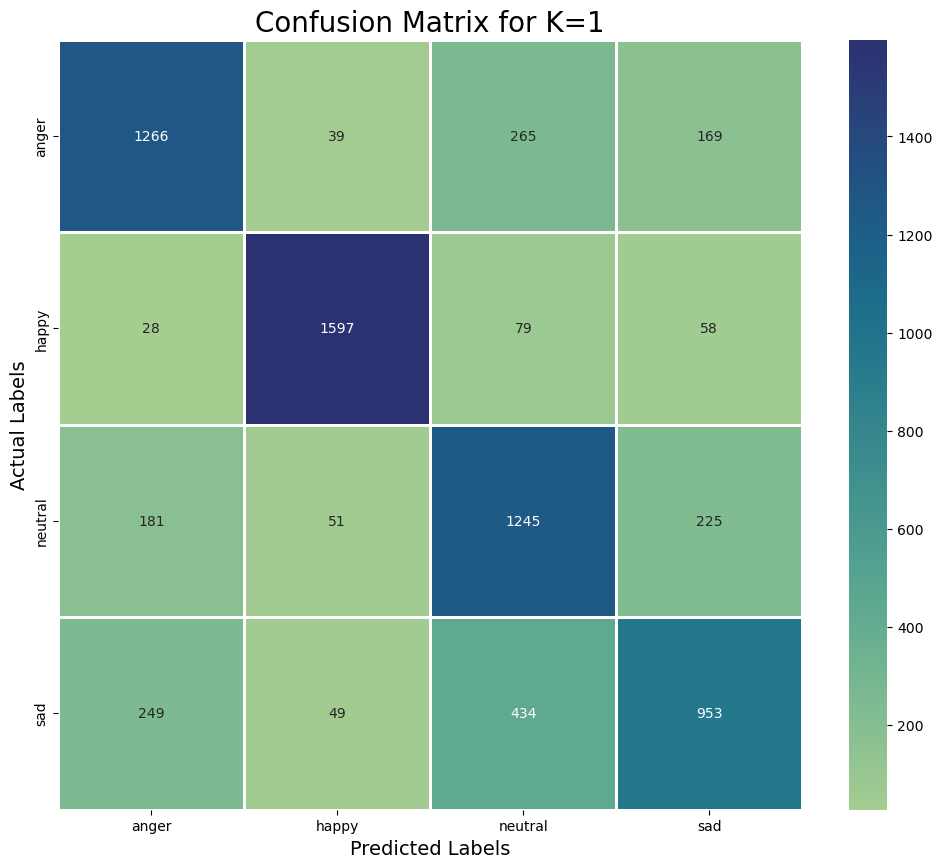

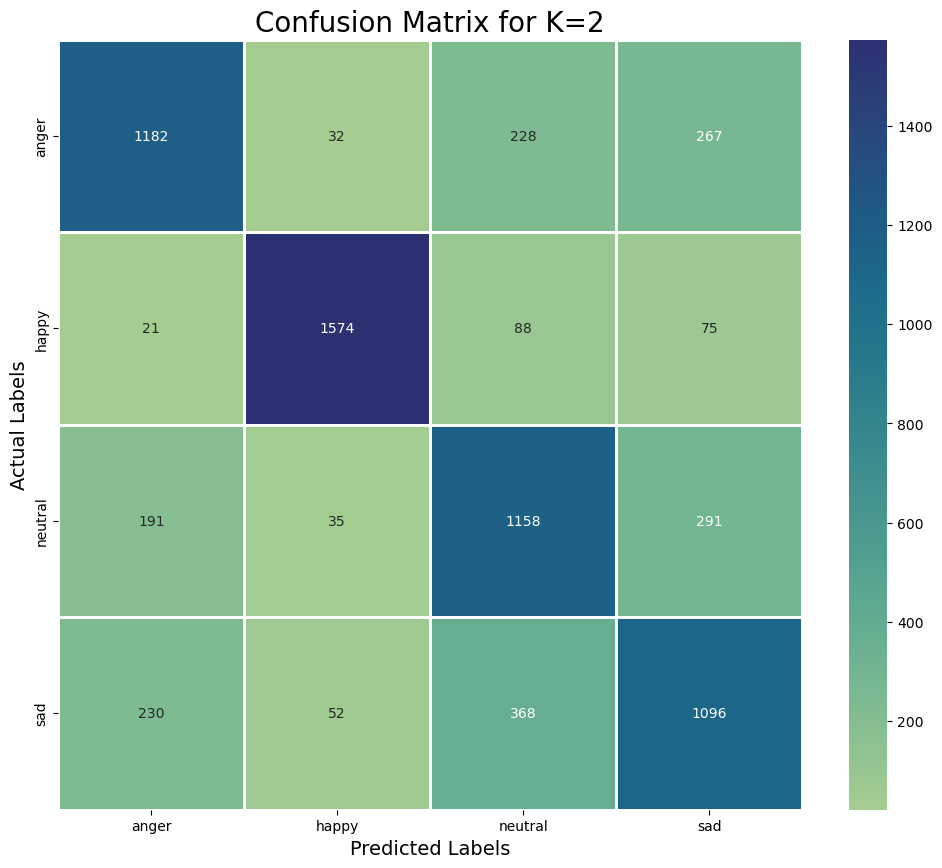

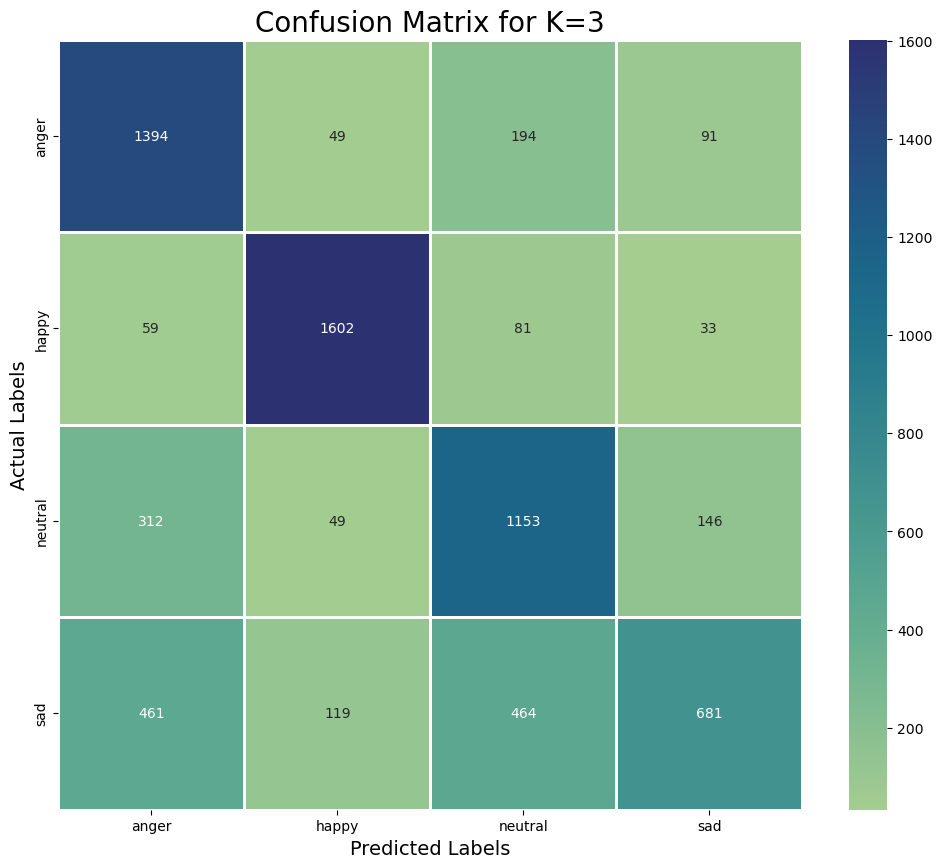

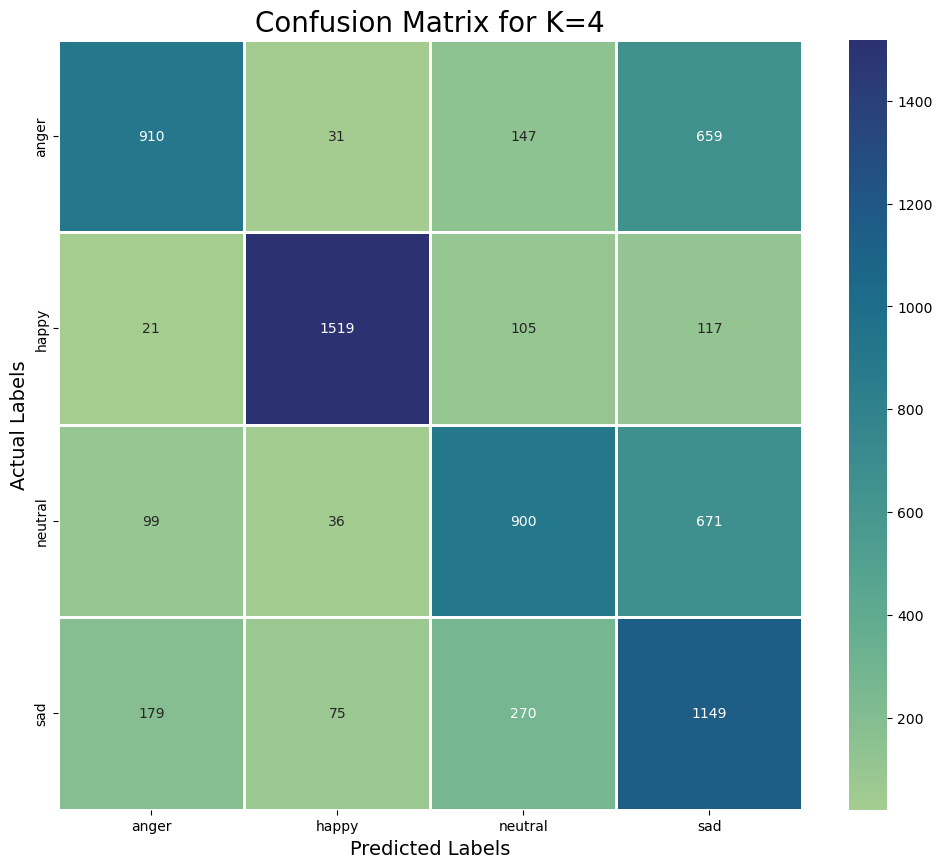

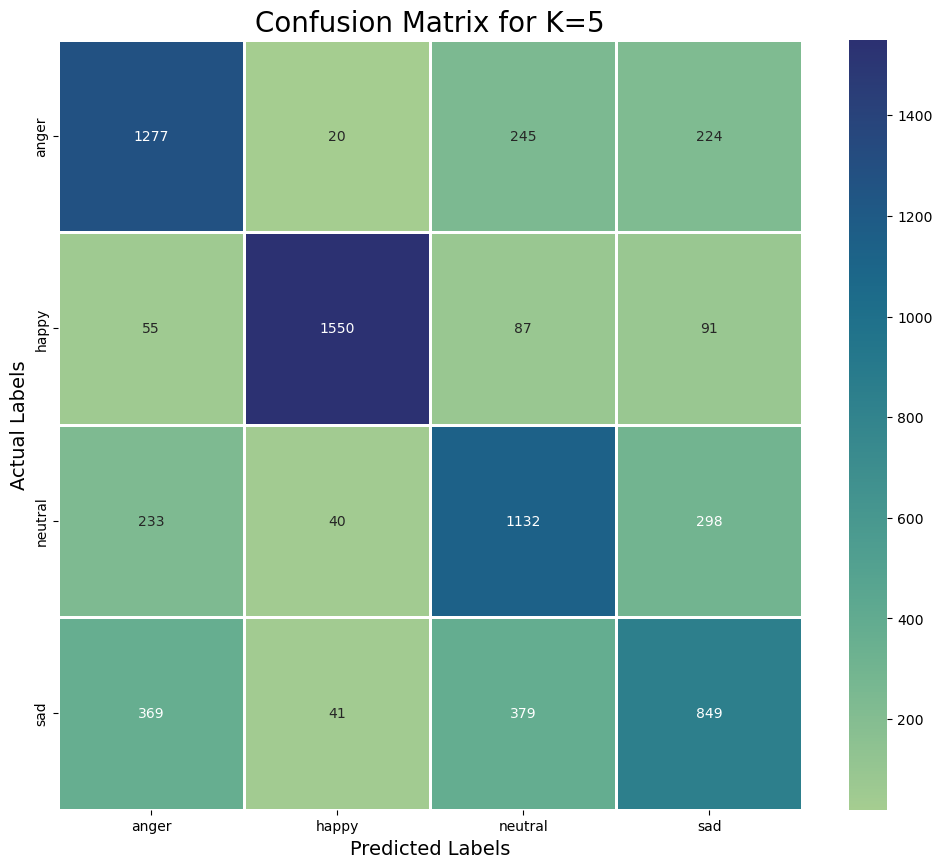

In [21]:
#Show each result in confusion matrix
for i in range(len(confusion_matrices)):
    cm = confusion_matrices[i]
    plt.figure(figsize = (12, 10))
    sns.heatmap(cm, linecolor='white', cmap='crest', linewidth=1, annot=True, fmt='')
    plt.title('Confusion Matrix for K='+str(i+1), size=20)
    plt.xlabel('Predicted Labels', size=14)
    plt.ylabel('Actual Labels', size=14)

In [22]:
#Show each score and summarize results

cross_val_score = {
    "accuracy": 0,
    "precision": 0,
    "recall": 0,
    "f1": 0
}
for i in range(len(scores)):
    acs_test = scores[i]['accuracy']
    ps_test = scores[i]['precision']
    rs_test = scores[i]['recall']
    fs_test = scores[i]['f1']
    
    print("Score Summary for K =",str(i+1))
    print("Accuracy Score: ", "{:.2%}".format(acs_test))
    print("Precision Score: ", "{:.2%}".format(ps_test))
    print("Recall Score: ", "{:.2%}".format(rs_test))
    print("F1 Score: ", "{:.2%}".format(fs_test))

    cross_val_score['accuracy'] += acs_test
    cross_val_score['precision'] += ps_test
    cross_val_score['recall'] += rs_test
    cross_val_score['f1'] += fs_test

cross_val_score['accuracy'] /= 5
cross_val_score['precision'] /= 5
cross_val_score['recall'] /= 5
cross_val_score['f1'] /= 5

Score Summary for K = 1
Accuracy Score:  73.48%
Precision Score:  73.70%
Recall Score:  73.29%
F1 Score:  73.24%
Score Summary for K = 2
Accuracy Score:  72.74%
Precision Score:  73.00%
Recall Score:  72.65%
F1 Score:  72.77%
Score Summary for K = 3
Accuracy Score:  70.12%
Precision Score:  70.81%
Recall Score:  69.97%
F1 Score:  68.87%
Score Summary for K = 4
Accuracy Score:  65.01%
Precision Score:  68.57%
Recall Score:  64.93%
F1 Score:  65.42%
Score Summary for K = 5
Accuracy Score:  69.78%
Precision Score:  69.85%
Recall Score:  69.39%
F1 Score:  69.48%


In [23]:
acs_test = cross_val_score['accuracy']
ps_test = cross_val_score['precision']
rs_test = cross_val_score['recall']
fs_test = cross_val_score['f1']

print("5-Fold Cross Validation Score Summary")
print("Accuracy Score: ", "{:.2%}".format(acs_test))
print("Precision Score: ", "{:.2%}".format(ps_test))
print("Recall Score: ", "{:.2%}".format(rs_test))
print("F1 Score: ", "{:.2%}".format(fs_test))


5-Fold Cross Validation Score Summary
Accuracy Score:  70.23%
Precision Score:  71.19%
Recall Score:  70.04%
F1 Score:  69.96%
